# Week_3
### 將資料分組後做視覺化分析
1. 取出需要的資料並對資料進行分類處理
2. 將資料依照時間作圖判斷資料趨勢

##### 匯入需要的函式庫

In [1]:
#import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

##### 觀察資料，尋找需要的資料

In [2]:
data = pd.read_csv(r'../../NTU_大數據與商業分析Datasets/Orders.csv', nrows = 2).T
data

,0,1
DateId,20150703,20150703
MemberId,1388133,1388133
OrderGroupCode,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...
TrackSourceTypeDef,Web,Web
TrackDeviceTypeDef,Mobile,Mobile
PayProfileTypeDef,SevenEleven,SevenEleven
SalesOrderSlaveId,4457777,4457778
SalePageId,1242871,1242880
IsMajor,True,True
IsGift,False,False


##### 匯入需要的資料群

In [3]:
data = pd.read_csv('../../NTU_大數據與商業分析Datasets/Orders.csv', index_col = False, 
                   usecols = ['DateId', 'MemberId', 'IsMajor', 'PromotionDiscount', 'ECouponDiscount', 'SalesOrderSlaveTotalPayment', 'ReturnGoodsDateId'])
data.head()

,DateId,MemberId,IsMajor,PromotionDiscount,ECouponDiscount,SalesOrderSlaveTotalPayment,ReturnGoodsDateId
0,20150703,1388133,True,0.0,0.0,350.0,NaN
1,20150703,1388133,True,0.0,0.0,199.0,NaN
2,20150703,1388133,True,0.0,0.0,199.0,NaN
3,20150703,1388133,True,0.0,0.0,225.0,NaN
4,20150703,365787,True,0.0,0.0,100.0,NaN


##### 資料預處理
* 除去退貨、非主件(贈品、送禮等)資料

In [4]:
data.drop(data[(~data.ReturnGoodsDateId.isna())|(data.IsMajor==False)].index,
          axis = 0, inplace = True)
data.head()

,DateId,MemberId,IsMajor,PromotionDiscount,ECouponDiscount,SalesOrderSlaveTotalPayment,ReturnGoodsDateId
0,20150703,1388133,True,0.0,0.0,350.0,NaN
1,20150703,1388133,True,0.0,0.0,199.0,NaN
2,20150703,1388133,True,0.0,0.0,199.0,NaN
3,20150703,1388133,True,0.0,0.0,225.0,NaN
4,20150703,365787,True,0.0,0.0,100.0,NaN


* 確認資料是否有折扣(Discount:PromotionDiscount/ECouponDiscount)

In [5]:
data['Discount'] = (data.PromotionDiscount!=0)|(data.ECouponDiscount!=0)
data['Date'] = pd.to_datetime(data.DateId.astype('int'), format = '%Y%m%d')
data.head()

,DateId,MemberId,IsMajor,PromotionDiscount,ECouponDiscount,SalesOrderSlaveTotalPayment,ReturnGoodsDateId,Discount,Date
0,20150703,1388133,True,0.0,0.0,350.0,NaN,False,2015-07-03
1,20150703,1388133,True,0.0,0.0,199.0,NaN,False,2015-07-03
2,20150703,1388133,True,0.0,0.0,199.0,NaN,False,2015-07-03
3,20150703,1388133,True,0.0,0.0,225.0,NaN,False,2015-07-03
4,20150703,365787,True,0.0,0.0,100.0,NaN,False,2015-07-03


* 確認使用者是否只出現一次（僅消費一次）

In [6]:
data['Once'] = (data.groupby('MemberId')['MemberId'].transform('value_counts') == 1)
data.head()

,DateId,MemberId,IsMajor,PromotionDiscount,ECouponDiscount,SalesOrderSlaveTotalPayment,ReturnGoodsDateId,Discount,Date,Once
0,20150703,1388133,True,0.0,0.0,350.0,NaN,False,2015-07-03,False
1,20150703,1388133,True,0.0,0.0,199.0,NaN,False,2015-07-03,False
2,20150703,1388133,True,0.0,0.0,199.0,NaN,False,2015-07-03,False
3,20150703,1388133,True,0.0,0.0,225.0,NaN,False,2015-07-03,False
4,20150703,365787,True,0.0,0.0,100.0,NaN,False,2015-07-03,False


* 將預處理所用到的資料移除，留下所需要的資料集

In [7]:
data.drop(axis = 1, inplace = True,
    labels = ['MemberId', 'DateId', 'IsMajor', 'PromotionDiscount', 'ECouponDiscount','ReturnGoodsDateId'])
data.head()

,SalesOrderSlaveTotalPayment,Discount,Date,Once
0,350.0,False,2015-07-03,False
1,199.0,False,2015-07-03,False
2,199.0,False,2015-07-03,False
3,225.0,False,2015-07-03,False
4,100.0,False,2015-07-03,False


##### 進行分組並分析其內資訊
* 觀察各組所貢獻之總銷售額

In [8]:
statistic = pd.DataFrame(data.groupby(['Once', 'Discount'])['SalesOrderSlaveTotalPayment'].sum())
statistic['Percentage (%)'] = statistic.SalesOrderSlaveTotalPayment/statistic.SalesOrderSlaveTotalPayment.sum()*100
statistic

SalesOrderSlaveTotalPayment  Percentage (%)
Once  Discount                                             
False False                     452116948.0       36.989228
      True                      756168857.0       61.864750
True  False                      10677724.0        0.873581
      True                        3330037.0        0.272442

* 將上述數據視覺化

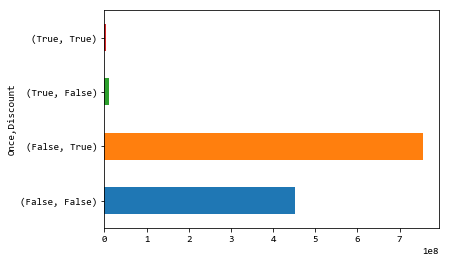

In [9]:
data.groupby(['Once', 'Discount'])['SalesOrderSlaveTotalPayment'].sum().plot.barh()

* 依照時間繪製不同類別的動態趨勢

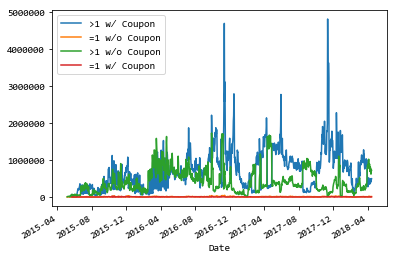

In [10]:
group = data.groupby(['Once', 'Discount'])
leg = []
mp = {(False, False) : '>1 w/o Coupon', (False, True) : '>1 w/ Coupon', 
     (True, False) : '=1 w/o Coupon', (True, True) : '=1 w/ Coupon'}
for gp in group.groups:
    pic = group.get_group(gp).groupby('Date')['SalesOrderSlaveTotalPayment'].sum().plot()
    leg.append(mp[gp])
pic.legend(leg)

In [11]:
#data['Date'] = pd.to_datetime(data['Date'].astype('int'), unit = 'd')
#data